## Linear Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
 df = pd.read_csv('USA_Housing.csv')

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

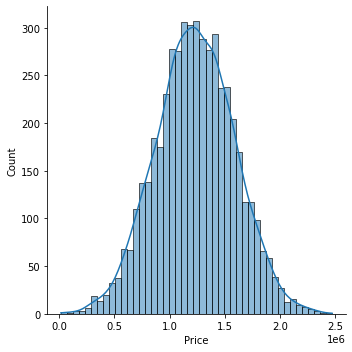

In [23]:
sns.displot(df['Price'],kde='true')
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

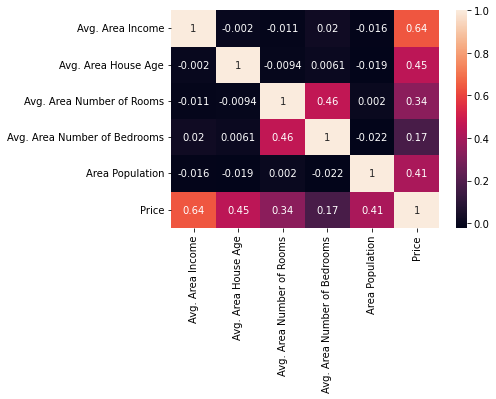

In [26]:
sns.heatmap(df.corr(),annot=True)

## Training the Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y= df['Price']

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [41]:
print(lm.intercept_)

-2640159.79685191


In [43]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [45]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=["Coeff"])


In [47]:
cdf.head()

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions


In [49]:
predictions = lm.predict(X_test)

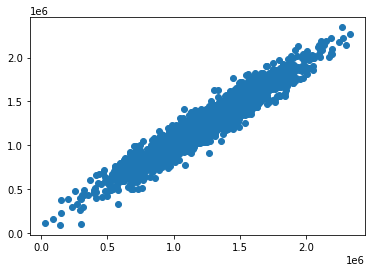

In [50]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='Price', ylabel='Count'>

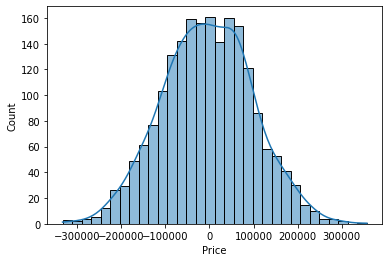

In [55]:
sns.histplot(y_test-predictions,kde="true")

## Evaluvation Metrics

In [57]:
from sklearn import metrics

In [59]:
metrics.mean_absolute_error(y_test,predictions)


10460958907.2095

In [60]:
metrics.mean_squared_error(y_test,predictions)

10460958907.2095

In [61]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291152